## **THEORY QUESTIONS**

### **Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).**

**Answer:**

* **Artificial Intelligence (AI)** is the broadest field. It's the concept of creating machines that can think and act like humans. This includes things like problem-solving, speech recognition, and decision-making. Think of it as the ultimate goal.

* **Machine Learning (ML)** is a subset of AI. It involves the use of algorithms that learn from data without being explicitly programmed. Instead of hard-coding rules, you give the model data and it learns the patterns itself. For example, a spam filter learns to identify spam by analyzing thousands of emails.

* **Deep Learning (DL)** is a more specialized subset of ML. It uses complex algorithms, specifically neural networks with multiple layers (hence "deep"), to find intricate patterns in data. DL is particularly effective for tasks like image and speech recognition, where the patterns are too complex for traditional ML.

* **Data Science (DS)** is a multidisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It combines elements of statistics, computer science, and domain expertise to solve real-world problems. While it uses ML and DL techniques, it also includes aspects like data cleaning, data visualization, and business intelligence.

### **Question 2: What are the types of machine learning? Describe each with one real-world example.**

**Answer:**

The three main types of machine learning are:

* **Supervised Learning**: This is when an algorithm learns from labeled data, meaning the input data is paired with the correct output. The goal is to learn a mapping from inputs to outputs.

  * **Example**: A model trained to predict house prices based on features like size, number of bedrooms, and location. The training data includes past house sales with their actual prices (the labels).

* **Unsupervised Learning**: This type of learning involves training an algorithm on unlabeled data. The goal is to find hidden patterns or structures in the data on its own.

  * **Example**: Grouping customers into different segments (e.g., "high-value," "frequent buyers," etc.) based on their purchasing behavior without any pre-defined categories. This is called clustering.

* **Reinforcement Learning**: This is a type of ML where an agent learns to make decisions in an environment to maximize a reward signal. It learns through a process of trial and error.

  * **Example**: An AI playing a game like chess. It learns which moves are good (reward) and which are bad (penalty) by playing against itself or other players, eventually becoming a master.

### **Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.**

**Answer:**

* **Overfitting**: This happens when a model learns the training data too well, including the noise and random fluctuations. While it performs great on the training data, it performs poorly on new, unseen data because it fails to generalize. It's like memorizing the answers to a test without understanding the concepts.

* **Underfitting**: This occurs when a model is too simple to capture the underlying patterns in the training data. It performs poorly on both the training and test data because it has not learned the fundamental relationship between the features and the target. It's like not studying enough for a test.

* **Bias-Variance Tradeoff**: This is a central concept in machine learning.

  * **Bias** is the simplifying assumptions made by a model to make the target function easier to learn. High bias models are overly simple and tend to underfit.

  * **Variance** is the sensitivity of the model to fluctuations in the training data. High variance models are complex and tend to overfit.

  * The **tradeoff** is the balance between these two. A good model strikes a balance between bias and variance, avoiding both underfitting and overfitting to achieve optimal performance on new data.

### **Question 4: What are outliers in a dataset, and list three common techniques for handling them.**

**Answer:**

An **outlier** is a data point that is significantly different from other observations in the dataset. They can occur due to measurement errors, data entry mistakes, or they might be genuine, rare events.

Three common techniques for handling outliers are:

1. **Removal**: The simplest method is to remove the outlier data points entirely. This is often done when the outlier is clearly a data entry error. However, it's not ideal if the outliers represent important information or if the dataset is small.

2. **Transformation**: You can apply mathematical transformations to the data to reduce the impact of outliers. Common transformations include the logarithmic transformation or square root transformation, which compress the range of values and can make the data less skewed.

3. **Imputation**: Instead of removing outliers, you can replace them with a more representative value, such as the mean, median, or mode of the feature. The median is often a better choice than the mean because it's less sensitive to the extreme value of the outlier itself.

### **Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.**

**Answer:**

**Handling missing values** is the process of dealing with "empty" data points in a dataset. Missing values can disrupt the performance of machine learning models, so they need to be addressed before training. The process typically involves either removing the data (if there are very few missing values) or, more commonly, imputing them, which means replacing the missing data with a substitute value.

* **Imputation technique for numerical data**: A common and simple technique is to replace the missing values with the median of the column. The median is robust to outliers and provides a good central tendency measure for the data.

* **Imputation technique for categorical data**: For categorical data, a common technique is to replace missing values with the mode (the most frequent category) of the column. This approach is simple and ensures the imputed value is a valid category.

## **PRACTICAL QUESTIONS**

### **Question 6: Write a Python program that:**
● Creates a synthetic imbalanced dataset with `make_classification()` from
`sklearn.datasets`.

● Prints the class distribution.

**Answer:**

In [5]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.95],
                           flip_y=0,
                           random_state=42)

print("Class distribution:")
print(Counter(y))

Class distribution:
Counter({np.int64(0): 950, np.int64(1): 50})


### **Question 7: Implement one-hot encoding using pandas for the following list of colors: `['Red', 'Green', 'Blue', 'Green', 'Red']`. Print the resulting dataframe.**

**Answer:**

In [6]:
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

color_series = pd.Series(colors)

one_hot_encoded_df = pd.get_dummies(color_series, prefix='color')

print(one_hot_encoded_df)

   color_Blue  color_Green  color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


### **Question 8: Write a Python script to:**
● Generate 1000 samples from a normal distribution.

● Introduce 50 random missing values.

● Fill missing values with the column mean.

● Plot a histogram before and after imputation.

**Answer:**

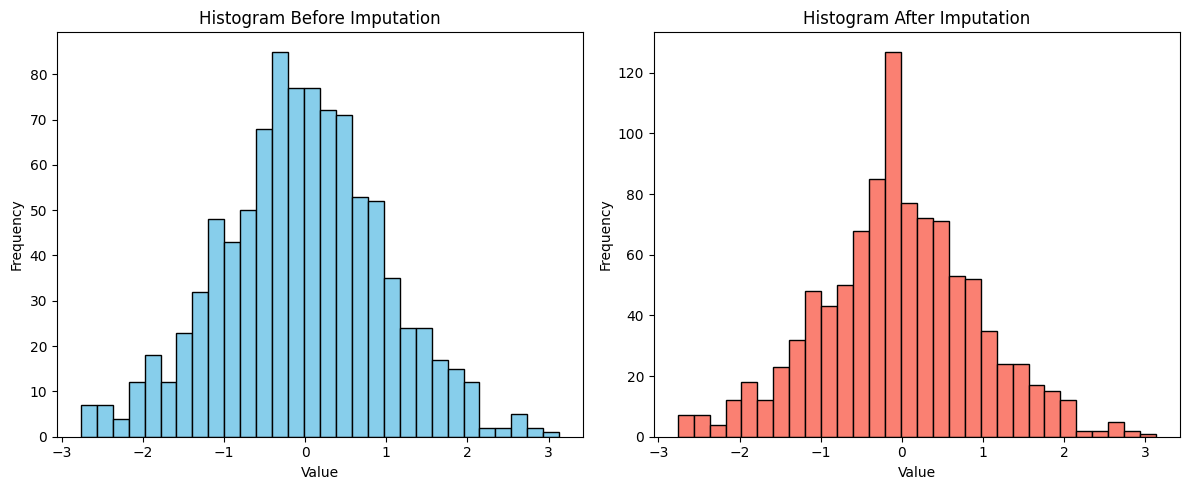

Histograms before and after imputation have been plotted.
Mean value used for imputation: -0.0397


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.random.normal(loc=0, scale=1, size=1000)
df = pd.DataFrame(data, columns=['value'])

missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'value'] = np.nan

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['value'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram Before Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')

mean_value = df['value'].mean()
df_imputed = df.fillna(mean_value)

plt.subplot(1, 2, 2)
plt.hist(df_imputed['value'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram After Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print a confirmation message
print("Histograms before and after imputation have been plotted.")
print(f"Mean value used for imputation: {mean_value:.4f}")

### **Question 9: Implement Min-Max scaling on the following list of numbers ` [2, 5, 10, 15, 20]` using `sklearn.preprocessing.MinMaxScaler`. Print the scaled array.**

**Answer:**

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# The list of numbers
data = np.array([2, 5, 10, 15, 28]).reshape(-1, 1)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data)

# Print the scaled array
print("Original data:", data.flatten())
print("Scaled data:")
print(scaled_data)

Original data: [ 2  5 10 15 28]
Scaled data:
[[0.        ]
 [0.11538462]
 [0.30769231]
 [0.5       ]
 [1.        ]]


### **Question 10: You are working as a data scientist for a retail company. You receive a customer transaction dataset that contains:**
● Missing ages,

● Outliers in transaction amount,

● A highly imbalanced target (fraud vs. non-fraud),

● Categorical variables like payment method.

**Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.**

**Answer:**


The step-by-step data preparation plan for the given retail dataset would involve addressing missing data, outliers, class imbalance, and categorical variables in a logical sequence before training a machine learning model.

**1. Handling Missing Data (Missing Ages)**

First, I'd address the missing values in the 'age' column. Since age is a numerical variable, a common and robust approach is to replace the missing values with the median. The median is a better choice than the mean because it's less sensitive to potential outliers in the age data, ensuring the imputed value doesn't skew the overall distribution.

**2. Handling Outliers (Transaction Amount)**

Next, I'd handle the outliers in the 'transaction amount'. I would first visualize the data to understand the nature of these outliers. If they are genuine but extreme values, a logarithmic transformation is an effective way to compress the range of values and reduce the impact of these large transactions on the model without discarding the data. This transformation makes the data distribution more normal-like. If the outliers are clear data entry errors, I would cap them at a reasonable percentile (e.g., the 99th percentile) or remove them if they are few.

**3. Encoding Categorical Variables (Payment Method)**

I would then convert the categorical variable 'payment method' into a numerical format that machine learning models can understand. The best technique for this is one-hot encoding. This creates new binary columns for each unique category (e.g., one for 'Credit Card', one for 'Debit Card'), where a '1' indicates the presence of that category and a '0' indicates its absence. This avoids creating an artificial ordinal relationship between the categories.

**4. Handling Class Imbalance (Fraud vs. Non-Fraud)**

The dataset has a highly imbalanced target variable. I would use Oversampling on the minority class (fraud). A powerful technique for this is SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic examples of the minority class, helping to balance the class distribution. This is critical for preventing the model from being biased towards the majority class and ensuring it can effectively detect rare fraudulent transactions.

**5. Feature Scaling**

Finally, after all the above steps, I would perform feature scaling on the numerical features like 'age' and 'transaction amount' (after the transformation). This step is important for many machine learning algorithms that are sensitive to the scale of input features. I would use Min-Max Scaling to transform the features to a common range (typically 0 to 1), ensuring that no single feature dominates the learning process due to its larger magnitude.
